# test

In [27]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import skewtest
import math

In [189]:
mu, sigma = 3, 2 # mean and standard deviation
# x = np.random.normal(mu, sigma, 20000)
x = np.random.exponential(1000, 50000)

# mu, sigma = 3, 1 # mean and standard deviation
# x = np.random.lognormal(mu, sigma, 1000)
# x = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x)**2  )
# x = np.random.rand(200000) #uniform

In [190]:
df = pd.DataFrame(x, columns = ['val'])

array([[<AxesSubplot:title={'center':'val'}>]], dtype=object)

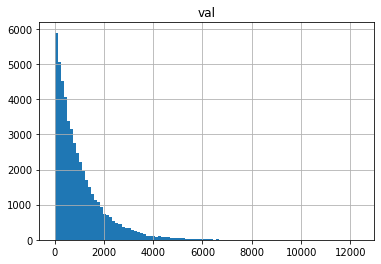

In [191]:
df.hist(bins = 100)

In [179]:
x.mean()

32.04763550718664

In [75]:
df

,val
0,2.351967
1,3.928597
2,5.333888
3,6.492307
4,5.049706
...,...
19995,-0.609536
19996,1.927845
19997,2.422953
19998,1.624407


<AxesSubplot:>

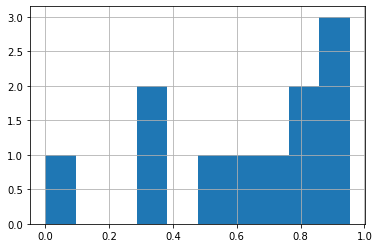

In [76]:
x = [1,2,2,3,4,5,6,7,8,9,9]
df = pd.DataFrame(x, columns=['val'])
np.log10(df['val']).hist()
# df

In [77]:
skewtest(x) # --> statistic < 1

SkewtestResult(statistic=0.10793170906705281, pvalue=0.914049863840515)

array([[<AxesSubplot:title={'center':'val'}>]], dtype=object)

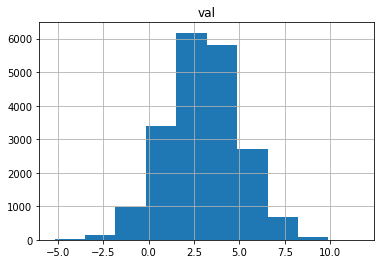

In [82]:
df.hist()

In [83]:
from scipy.stats import normaltest

stat, p = normaltest(df)
print('stat = {0}, p = {1}'.format(stat, p))
if p > 0.05:
    print('norm')
else:
    print('not norm')


stat = [1.67693569], p = [0.43237248]
norm


In [84]:
from scipy.stats import kstest
stat, p = kstest(df, 'norm')
print('stat = {0}, p = {1}'.format(stat, p))
if p > 0.05:
    print('norm')
else:
    print('not norm')

stat = 1.0, p = 0.0
not norm


In [85]:
from scipy.stats import shapiro
stat, p = shapiro(df)
print('stat = {0}, p = {1}'.format(stat, p))
if p > 0.05:
    print('norm')
else:
    print('not norm')


stat = 0.9999265074729919, p = 0.8732671141624451
norm


D:\Miniconda\envs\data-sci\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [86]:
from scipy.stats import skewtest

stat, p = skewtest(x)
print('stat = {0}, p = {1}'.format(stat, p))
if stat < 1:
    print('balance')
else:
    print('not balance')

stat = -0.16794648722133607, p = 0.8666253779792008
balance


D:\Miniconda\envs\data-sci\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


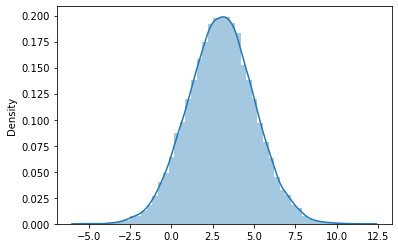

In [87]:
import seaborn as sns
ax = sns.distplot(df)

# real data

In [43]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import skewtest
# import math

In [44]:
df = pd.read_csv('data/20-10-21/R1L1-J2-data.csv')
df = df[df['status'] == 'normal']
# df = df[(df['date'] == '05/09/2021') | (df['date'] == '06/09/2021')]
df

,Unnamed: 0,date,time,temperature,voltage_1,voltage_2,voltage_3,voltage_4,voltage_5,voltage_6,...,pf_4,pf_5,pf_6,frequency_1,frequency_2,frequency_3,frequency_4,frequency_5,frequency_6,status
0,0,19/08/2021,02:31:39,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,normal
1,1,19/08/2021,02:31:52,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,normal
2,2,20/08/2021,03:24:44,22,225,225,227,225,226,226,...,0,0,0,50,50,50,50,50,50,normal
3,3,20/08/2021,03:25:19,23,225,225,227,225,225,225,...,0,0,0,49,49,50,49,50,50,normal
4,4,03/09/2021,08:49:44,0,3979,9,9,236,240,239,...,0,0,0,0,474,232,49,49,50,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60432,60432,14/10/2021,15:46:47,36,237,239,239,236,238,237,...,0,0,0,50,50,50,50,50,50,normal
60433,60433,14/10/2021,15:46:59,34,237,239,239,236,238,237,...,0,0,0,50,50,50,50,50,50,normal
60434,60434,14/10/2021,15:47:11,34,237,239,239,235,238,237,...,0,0,0,50,49,49,49,50,50,normal
61295,61295,14/10/2021,22:29:11,35,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal


In [62]:
# def clean(df):
focus = 'current_1'
df_focus =  df[['date','time', focus]]	

df_focus = df_focus[df_focus[focus] > 1]
df_focus = df_focus[df_focus[focus] < 100]

df_focus = df_focus.sample(frac=1).reset_index(drop=True)[:50]

array([<AxesSubplot:title={'center':'current_1'}>], dtype=object)

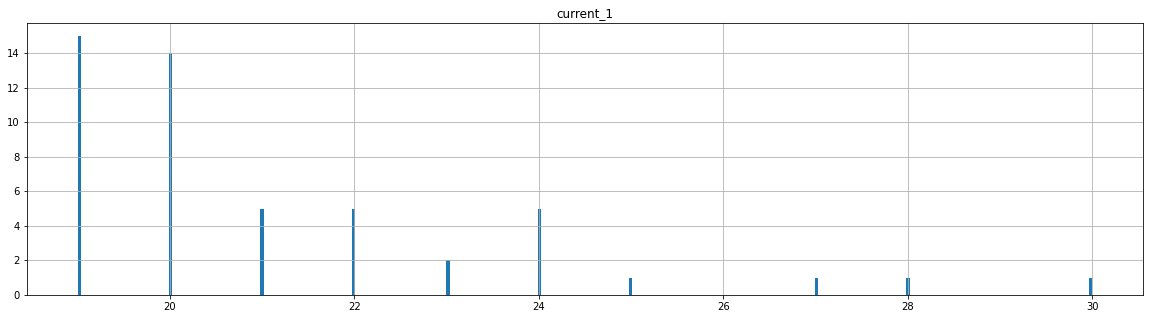

In [63]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 1, figsize=(20,5))
df_focus[[focus]].hist(bins = 300,ax=axes)

===================normaltest=========================
stat = 23.130762755295244, p = 9.488961544245138e-06
not norm


===================anderson=========================
stat = AndersonResult(statistic=4.978167947551739, critical_values=array([0.461, 0.619, 0.736, 0.853, 1.009]), significance_level=array([25. , 10. ,  5. ,  2.5,  1. ]))
===================kstest=========================
stat = 1.0, p = 0.0
not norm


===================shapiro=========================
stat = 0.7940707206726074, p = 6.418966904675472e-07
not norm


===================skwness=========================
stat = 4.029271689581728, p = 5.594992512437367e-05
not balance




D:\Miniconda\envs\data-sci\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


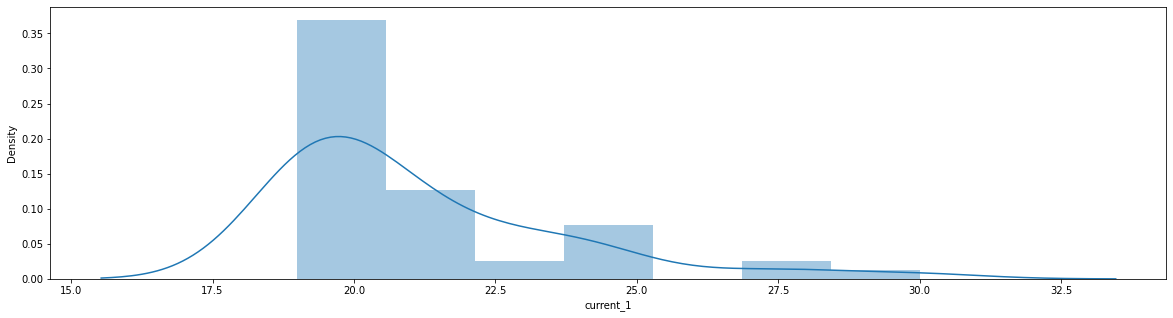

In [207]:
from scipy.stats import normaltest
from scipy.stats import kstest
from scipy.stats import shapiro
from scipy.stats import skewtest
import seaborn as sns


print('===================normaltest=========================')
stat, p = normaltest(df_focus[focus])
print('stat = {0}, p = {1}'.format(stat, p))
if p > 0.05:
    print('norm')
else:
    print('not norm')
print('\n')

print('===================anderson=========================')
stat= anderson(df_focus[focus], 'extreme1')
print('stat = {0}'.format(stat))
    

print('===================kstest=========================')
stat, p = kstest(df_focus[focus], 'norm')
print('stat = {0}, p = {1}'.format(stat, p))
if p > 0.05:
    print('norm')
else:
    print('not norm')
print('\n')



print('===================shapiro=========================')
stat, p = shapiro(df_focus[focus])
print('stat = {0}, p = {1}'.format(stat, p))
if p > 0.05:
    print('norm')
else:
    print('not norm')
print('\n')



print('===================skwness=========================')
stat, p = skewtest(df_focus[focus])
print('stat = {0}, p = {1}'.format(stat, p))
if stat < 1:
    print('balance')
else:
    print('not balance')
print('\n')

fig, axes = plt.subplots(1, 1, figsize=(20,5))
ax = sns.distplot(df_focus[focus])

In [80]:
print(stats.kstest(np.random.exponential(1, 500),'expon'))
print('===================kstest=========================')
stat , p= kstest(df_focus[focus], 'expon')
print('stat = {0}, p = {1}'.format(stat, p))
if p > 0.05:
    print('norm')
else:
    print('not norm')
print('\n')

KstestResult(statistic=0.022471662611800558, pvalue=0.957414426592859)
===================kstest=========================
stat = 0.9999999943972036, p = 0.0
not norm




In [201]:
from scipy.stats import normaltest
from scipy.stats import kstest
from scipy.stats import shapiro
from scipy.stats import skewtest
from scipy.stats import skew
from scipy.stats import anderson

import seaborn as sns

def stat_check(df_focus):
    print('===================normaltest=========================')
    stat, p = normaltest(df_focus['tranform'])
    print('stat = {0}, p = {1}'.format(stat, p))
    if p > 0.05:
        print('norm')
    else:
        print('not norm')
    print('\n')

    print('===================kstest=========================')
    stat, p = kstest(df_focus['tranform'], 'norm')
    print('stat = {0}, p = {1}'.format(stat, p))
    if p > 0.05:
        print('norm')
    else:
        print('not norm')
    print('\n')
    
    print('===================anderson=========================')
    stat= anderson(df_focus['tranform'], 'norm')
    print('stat = {0}'.format(stat))
    # if p > 0.05:
    #     print('norm')
    # else:
    #     print('not norm')
    # print('\n')



    print('===================shapiro=========================')
    stat, p = shapiro(df_focus['tranform'])
    print('stat = {0}, p = {1}'.format(stat, p))
    if p > 0.05:
        print('norm')
    else:
        print('not norm')
    print('\n')



    print('===================skwness=========================')
    stat, p = skewtest(df_focus['tranform'])
    print('stat = {0}, p = {1}'.format(stat, p))
    if stat < 1:
        print('balance')
    else:
        print('not balance')
    print('\n')
    
    print('===================skew=========================')
    stat= skew(df_focus['tranform'])
    print('stat = {0}'.format(stat))
    if stat < 1:
        print('balance')
    else:
        print('not balance')
    print('\n')

    ax = sns.distplot(df_focus['tranform'])

===================normaltest=========================
stat = 13.285880801553667, p = 0.0013031897046298323
not norm


===================kstest=========================
stat = 0.5724339297076471, p = 4.909653905054538e-16
not norm


===================anderson=========================
stat = AndersonResult(statistic=2.724026286462312, critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
===================shapiro=========================
stat = 0.8379729390144348, p = 7.42482416171697e-06
not norm


===================skwness=========================
stat = 3.3008340313104068, p = 0.0009639788827850947
not balance


===================skew=========================
stat = 1.2164461167607923
not balance




D:\Miniconda\envs\data-sci\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


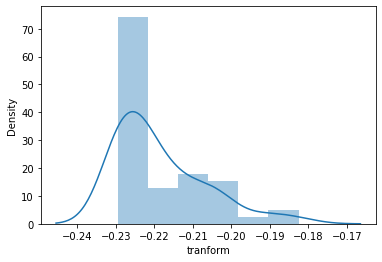

In [202]:
df_focus['tranform'] = -1/np.sqrt(df_focus[focus])
# df_focus['tranform'].hist(bins = 100)
stat_check(df_focus)

===================normaltest=========================
stat = 1300.8724471631695, p = 3.304739782564398e-283
not norm


===================kstest=========================
stat = 0.9989788426173934, p = 0.0
not norm


===================shapiro=========================
stat = 0.8774201273918152, p = 0.0
not norm


===================skwness=========================
stat = 34.59997004052897, p = 2.5290739761300047e-262
not balance


===================skew=========================
stat = 1.028867823671843
not balance




D:\Miniconda\envs\data-sci\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
D:\Miniconda\envs\data-sci\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


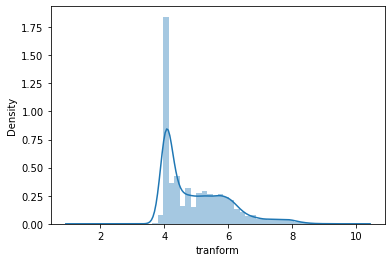

In [15]:
df_focus['tranform'] = np.sqrt(df_focus[focus])
# df_focus['tranform'].hist(bins = 100)
stat_check(df_focus)

===================normaltest=========================
stat = 459.4136704649744, p = 1.7361570294806788e-100
not norm


===================kstest=========================
stat = 0.8780513732809805, p = 0.0
not norm


===================shapiro=========================
stat = 0.9015942811965942, p = 0.0
not norm


===================skwness=========================
stat = 20.55624694248456, p = 6.766917292466562e-94
not balance


===================skew=========================
stat = 0.5453971831516367
balance




D:\Miniconda\envs\data-sci\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
D:\Miniconda\envs\data-sci\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


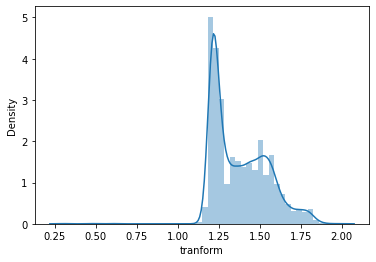

In [11]:
df_focus['tranform'] = np.log10((df_focus[focus]))
# df_focus['tranform'].hist(bins = 100)
stat_check(df_focus)

===================normaltest=========================
stat = 990.5678179665041, p = 7.960335151755336e-216
not norm


===================kstest=========================
stat = 0.9559457687456445, p = 0.0
not norm


===================shapiro=========================
stat = 0.8931649923324585, p = 0.0
not norm


===================skwness=========================
stat = -4.483206208850312, p = 7.352981199672045e-06
balance


===================skew=========================
stat = -0.11187614589252928
balance


-0.36035272205469565


D:\Miniconda\envs\data-sci\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
D:\Miniconda\envs\data-sci\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


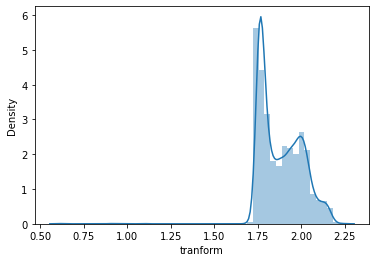

In [16]:
from scipy import stats
df_focus['tranform'], lamda = stats.boxcox(df_focus[focus])
# df_focus['tranform'].hist(bins = 50)
stat_check(df_focus)
print(lamda)

===================normaltest=========================
stat = 888.5570621733349, p = 1.1279387604076788e-193
not norm


===================kstest=========================
stat = 0.9346622735285582, p = 0.0
not norm


===================shapiro=========================
stat = 0.8952360153198242, p = 0.0
not norm


===================skwness=========================
stat = -4.306211366160761, p = 1.6607437922225777e-05
balance


===================skew=========================
stat = -0.10743355802991403
balance


-0.48246099632630257


D:\Miniconda\envs\data-sci\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
D:\Miniconda\envs\data-sci\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


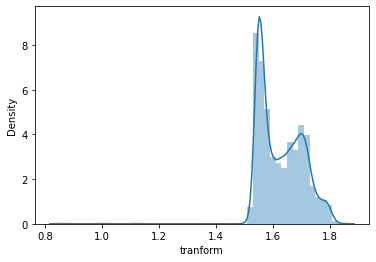

In [17]:
from scipy import stats
df_focus['tranform'], lamda = stats.yeojohnson(df_focus[focus])
# df_focus['tranform'].hist(bins = 50)
stat_check(df_focus)
print(lamda)

In [12]:
q25,q75 = df_focus[focus].quantile([0.25,0.75])
q2,q98 = df_focus[focus].quantile([0.02,0.98])

iqr = q75 - q25
lower_temp = q25 - (1.5*iqr)
upper_temp = q75 + (1.5*iqr)
print('critical: {0},{1}'.format(lower_temp, upper_temp))
print('alert: {0},{1}'.format(q2,q98))

print('\n tranform')
q25,q75 = df_focus['tranform'].quantile([0.25,0.75])
q2,q98 = df_focus['tranform'].quantile([0.02,0.98])

iqr = q75 - q25
lower_temp = q25 - (iqr)
upper_temp = q75 + (iqr)
print('critical: {0},{1}'.format(lower_temp, upper_temp))
print('alert: {0},{1}'.format(q2,q98))

critical: -5.5,54.5
alert: 16.0,60.0

 tranform
critical: 1.4284450632379615,1.8193901227997562
alert: 1.5443899062833246,1.7874825988575813


In [19]:
# df_focus.median()
# stats.boxcox([1, 60],-0.36035272205469565)
stats.yeojohnson([1, -60],-0.48246099632630257)

array([ 5.89155143e-01, -1.08921393e+04])

In [14]:
# check normality

# Production YeoJohnson

In [7]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import skewtest
# import math

In [8]:
from scipy.stats import normaltest
from scipy.stats import kstest
from scipy.stats import shapiro
from scipy.stats import skewtest
from scipy.stats import skew
import seaborn as sns

def stat_check(df_focus):
    print('===================normaltest=========================')
    stat, p = normaltest(df_focus['tranform'])
    print('stat = {0}, p = {1}'.format(stat, p))
    if p > 0.05:
        print('norm')
    else:
        print('not norm')
    print('\n')

    
    print('===================kstest=========================')
    stat, p = kstest(df_focus['tranform'], 'norm')
    print('stat = {0}, p = {1}'.format(stat, p))
    if p > 0.05:
        print('norm')
    else:
        print('not norm')
    print('\n')



    print('===================shapiro=========================')
    stat, p = shapiro(df_focus['tranform'])
    print('stat = {0}, p = {1}'.format(stat, p))
    if p > 0.05:
        print('norm')
    else:
        print('not norm')
    print('\n')



    print('===================skwness=========================')
    stat, p = skewtest(df_focus['tranform'])
    print('stat = {0}, p = {1}'.format(stat, p))
    if stat < 1:
        print('balance')
    else:
        print('not balance')
    print('\n')
    
    
    print('===================skew=========================')
    stat= skew(df_focus['tranform'])
    print('stat = {0}'.format(stat))
    if stat < 1:
        print('balance')
    else:
        print('not balance')
    print('\n')
    
    fig, axes = plt.subplots(2, 1, figsize=(20,10))
    # ax = sns.distplot(df_focus['tranform'])
    df_focus[focus].hist(bins=200,ax=axes[0])
    df_focus['tranform'].hist(bins=200,ax=axes[1])
    

In [9]:
df = pd.read_csv('data/20-10-21/R1L1-J2-data.csv')
df = df[df['status'] == 'normal']
# df = df[(df['date'] == '05/09/2021') | (df['date'] == '06/09/2021')]
df

,Unnamed: 0,date,time,temperature,voltage_1,voltage_2,voltage_3,voltage_4,voltage_5,voltage_6,...,pf_4,pf_5,pf_6,frequency_1,frequency_2,frequency_3,frequency_4,frequency_5,frequency_6,status
0,0,19/08/2021,02:31:39,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,normal
1,1,19/08/2021,02:31:52,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,normal
2,2,20/08/2021,03:24:44,22,225,225,227,225,226,226,...,0,0,0,50,50,50,50,50,50,normal
3,3,20/08/2021,03:25:19,23,225,225,227,225,225,225,...,0,0,0,49,49,50,49,50,50,normal
4,4,03/09/2021,08:49:44,0,3979,9,9,236,240,239,...,0,0,0,0,474,232,49,49,50,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60432,60432,14/10/2021,15:46:47,36,237,239,239,236,238,237,...,0,0,0,50,50,50,50,50,50,normal
60433,60433,14/10/2021,15:46:59,34,237,239,239,236,238,237,...,0,0,0,50,50,50,50,50,50,normal
60434,60434,14/10/2021,15:47:11,34,237,239,239,235,238,237,...,0,0,0,50,49,49,49,50,50,normal
61295,61295,14/10/2021,22:29:11,35,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal


In [10]:
# def clean(df):
focus = 'current_5'
df_focus =  df[['date','time', focus]]

df_focus = df_focus[df_focus[focus] > 1]
df_focus = df_focus[df_focus[focus] < 100]
df_focus
# df_focus[focus].value_counts()

,date,time,current_5
4,03/09/2021,08:49:44,20
5,03/09/2021,08:49:55,20
6,03/09/2021,08:50:19,20
7,03/09/2021,08:50:30,20
8,03/09/2021,08:50:42,20
...,...,...,...
60430,14/10/2021,15:46:01,3
60431,14/10/2021,15:46:24,2
60432,14/10/2021,15:46:47,2
60433,14/10/2021,15:46:59,2


array([<AxesSubplot:title={'center':'current_5'}>], dtype=object)

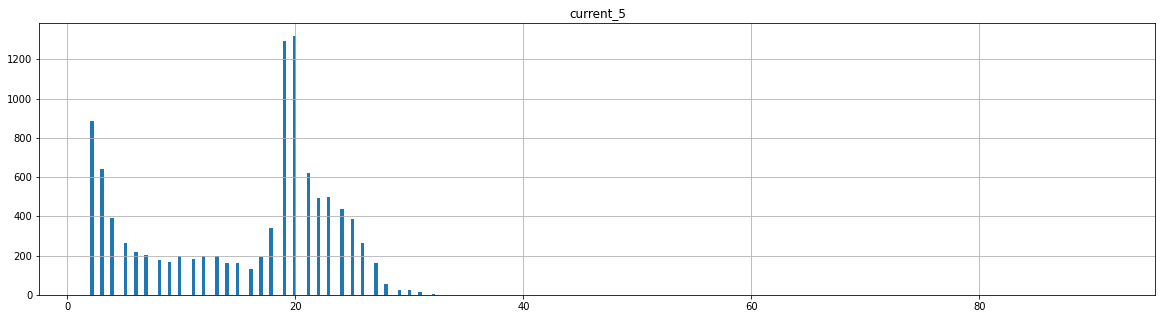

In [11]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 1, figsize=(20,5))
df_focus[[focus]].hist(bins = 300,ax=axes)

===================normaltest=========================
stat = 176.7992480107692, p = 4.0600472902197394e-39
not norm


===================kstest=========================
stat = 0.9786870370561174, p = 0.0
not norm


===================shapiro=========================
stat = 0.8878070116043091, p = 0.0
not norm


===================skwness=========================
stat = -11.754779553128667, p = 6.673468974908762e-32
balance


===================skew=========================
stat = -0.28910370037324706
balance


1.0209362609691661


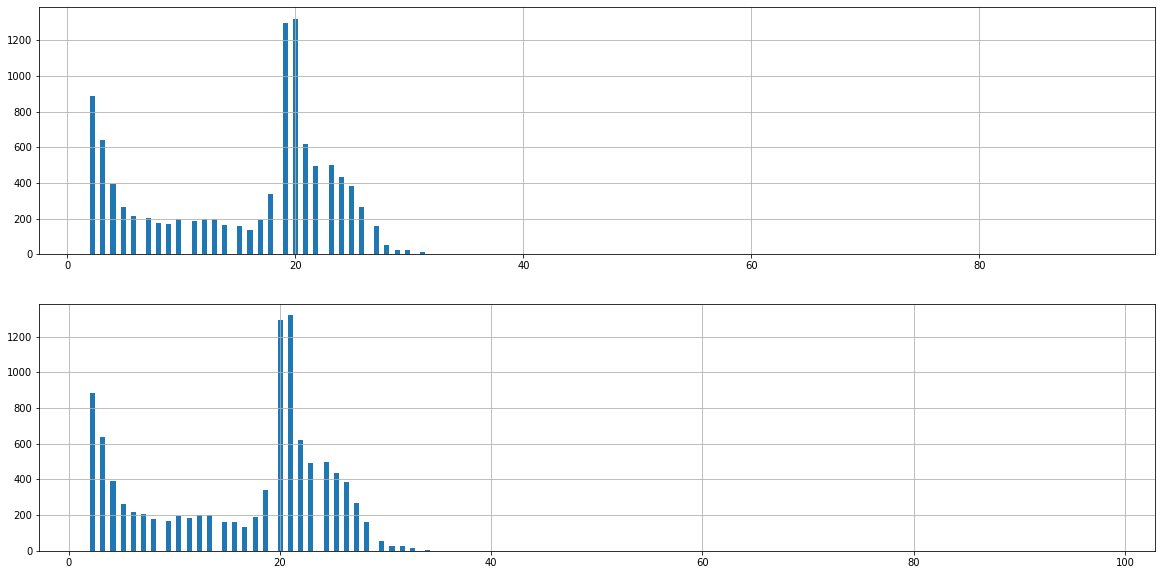

In [39]:
from scipy import stats
df_focus['tranform'], lamda = stats.yeojohnson(df_focus[focus])
# df_focus['tranform'], lamda = stats.boxcox(df_focus[focus])
# df_focus['tranform'] =  1/df_focus[focus]

# df_focus['tranform'], lamda = stats.boxcox(df_focus['tranform'])

# df_focus['tranform'] = np.log10(df_focus[focus])
# df_focus['tranform'] = -1/np.sqrt(df_focus[focus])
# df_focus['tranform'].hist(bins = 50)
stat_check(df_focus)
print(lamda)

In [40]:
print('\n Normal')
q25,q75 = df_focus[focus].quantile([0.25,0.75])
q2,q98 = df_focus[focus].quantile([0.02,0.98])

iqr = q75 - q25
lower_temp = q25 - (1.5*iqr)
upper_temp = q75 + (1.5*iqr)
print('critical: {0},{1}'.format(lower_temp, upper_temp))
print('alert: {0},{1}'.format(q2,q98))

print('\n tranform')
q25,q75 = df_focus['tranform'].quantile([0.25,0.75])
q2,q98 = df_focus['tranform'].quantile([0.02,0.98])

iqr = q75 - q25
lower_temp = q25 - (1.5*iqr)
upper_temp = q75 + (1.5*iqr)
print('critical: {0},{1}'.format(lower_temp, upper_temp))
print('alert: {0},{1}'.format(q2,q98))


 Normal
critical: -14.0,42.0
alert: 2.0,27.0

 tranform
critical: -15.002172395593767,44.21730074513118
alert: 2.0273569043378563,28.427964586458437


In [252]:
stats.yeojohnson(14, lamda)

array(2.03076197)